# This is the Test file for the CNN basic models(blur, night_vis, outline, poster)

### Imports

In [9]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

BASE_TEST = "/Users/amayakof/Desktop/2025_autumn/deep_learning/SIS/3/project/test/img"
MODEL_DIR = "/Users/amayakof/Desktop/2025_autumn/deep_learning/SIS/3/project/models"
RESULT_DIR = "/Users/amayakof/Desktop/2025_autumn/deep_learning/SIS/3/project/results/simple_mod"

os.makedirs(RESULT_DIR, exist_ok=True)

STYLES = ["blur", "night_vis", "poster", "outline"]
IMAGE_SIZE = (256, 256)

In [10]:

# loading imgs
def load_test_images(folder):
    imgs = []
    names = []
    for fname in sorted(os.listdir(folder)):
        if fname.lower().endswith((".png", ".jpg", ".jpeg", ".bmp", ".tiff")):
            path = os.path.join(folder, fname)
            img = cv2.imread(path)
            if img is None:
                continue

            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, IMAGE_SIZE)
            img = img.astype("float32") / 255.0

            imgs.append(img)
            names.append(fname)
    return np.array(imgs), names

test_imgs, test_names = load_test_images(BASE_TEST)
print("Loaded test images:", test_imgs.shape)

Loaded test images: (4, 256, 256, 3)


In [11]:
def show_results_grid(style_name, inputs, outputs, names, rows):
    n = min(len(inputs), rows)
    plt.figure(figsize=(6, n * 2.8))

    for i in range(n):
        inp = inputs[i]
        out = outputs[i]

        # Input
        plt.subplot(n, 2, i*2 + 1)
        plt.imshow(inp)
        plt.title(f"Input: {names[i]}", fontsize=9)
        plt.axis("off")

        # Output
        plt.subplot(n, 2, i*2 + 2)
        plt.imshow(out)
        plt.title(f"{style_name} output", fontsize=9)
        plt.axis("off")

    plt.tight_layout()
    plt.show()


 Testing style: BLUR
Loaded model: /Users/amayakof/Desktop/2025_autumn/deep_learning/SIS/3/project/models/autoencoder_blur.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step
Saved outputs to: /Users/amayakof/Desktop/2025_autumn/deep_learning/SIS/3/project/results/simple_mod/blur


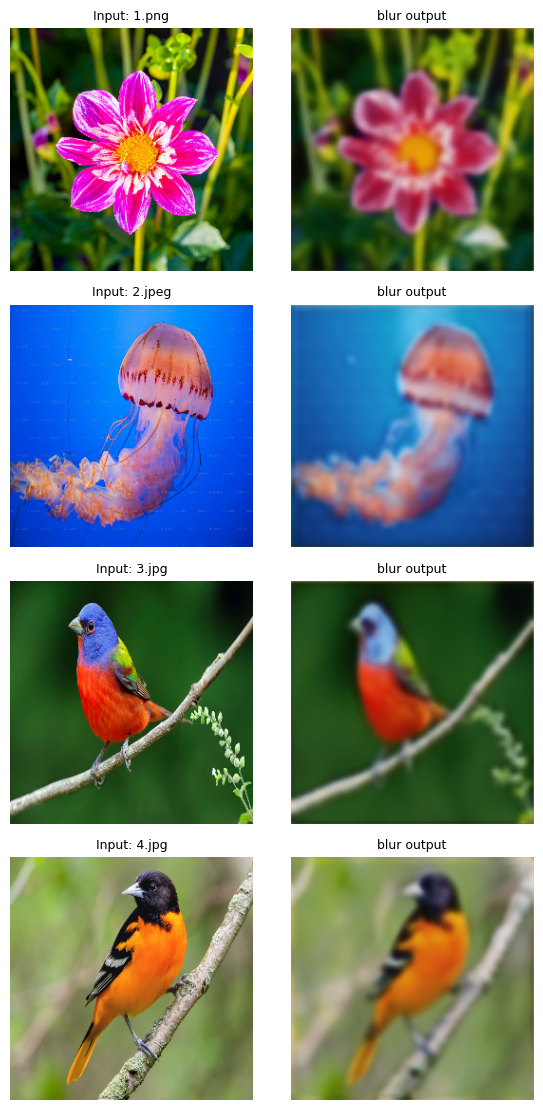


 Testing style: NIGHT_VIS
Loaded model: /Users/amayakof/Desktop/2025_autumn/deep_learning/SIS/3/project/models/autoencoder_night_vis.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step
Saved outputs to: /Users/amayakof/Desktop/2025_autumn/deep_learning/SIS/3/project/results/simple_mod/night_vis


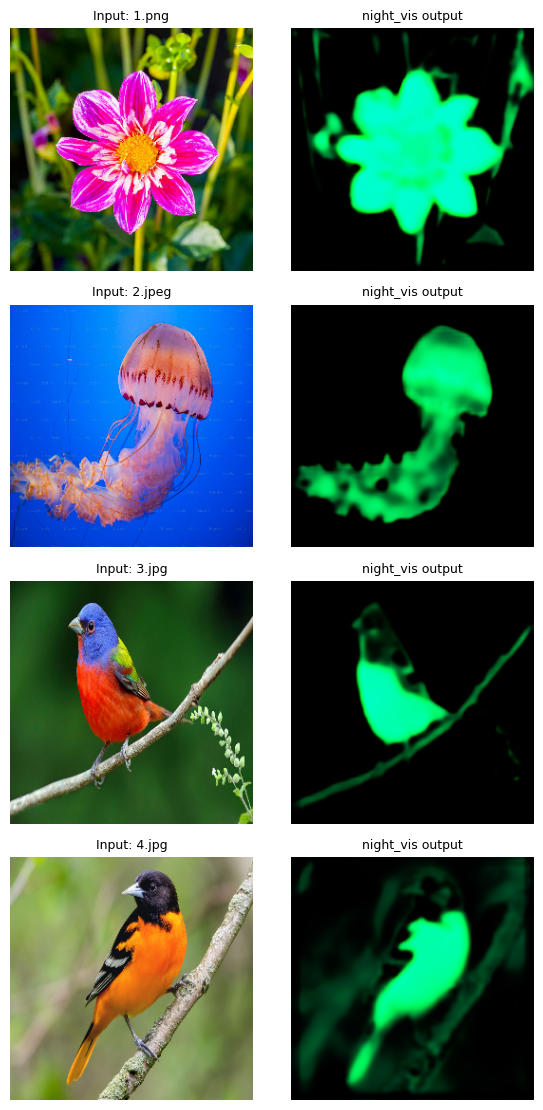


 Testing style: POSTER
Loaded model: /Users/amayakof/Desktop/2025_autumn/deep_learning/SIS/3/project/models/autoencoder_poster.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
Saved outputs to: /Users/amayakof/Desktop/2025_autumn/deep_learning/SIS/3/project/results/simple_mod/poster


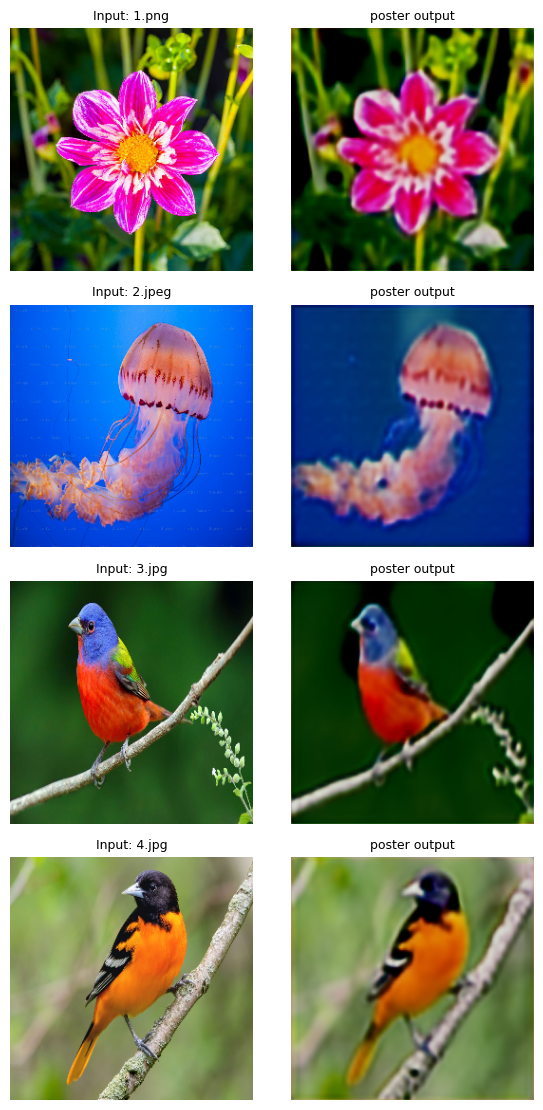


 Testing style: OUTLINE
Loaded model: /Users/amayakof/Desktop/2025_autumn/deep_learning/SIS/3/project/models/autoencoder_outline.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
Saved outputs to: /Users/amayakof/Desktop/2025_autumn/deep_learning/SIS/3/project/results/simple_mod/outline


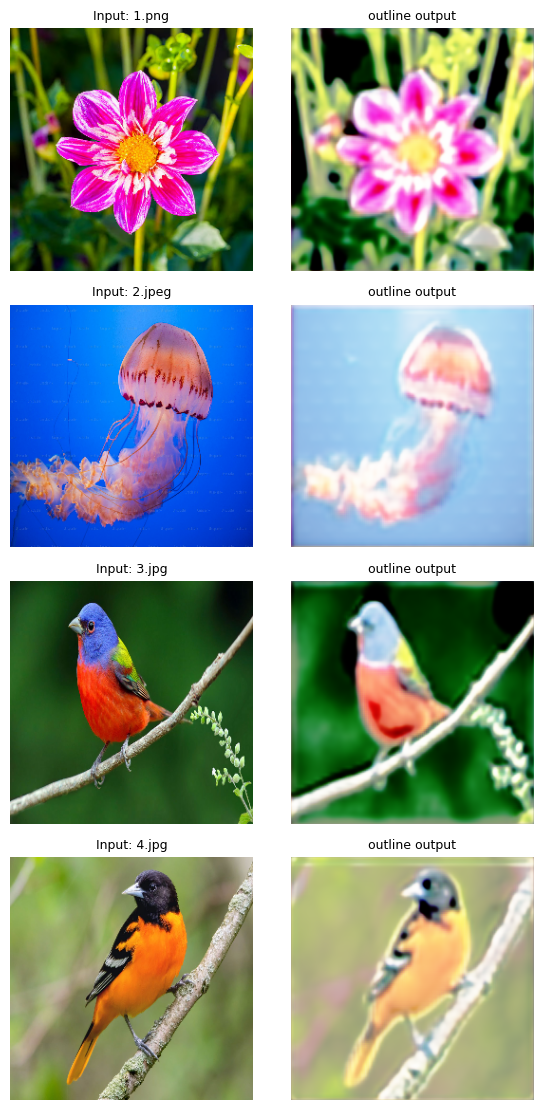

In [12]:

# run all styles
for style in STYLES:
    print("\n============================")
    print(f" Testing style: {style.upper()}")
    print("============================")

    # Load model
    model_path = os.path.join(MODEL_DIR, f"autoencoder_{style}.keras")
    if not os.path.exists(model_path):
        print("Model not found:", model_path)
        continue

    model = load_model(model_path)
    print("Loaded model:", model_path)

    # Predict
    preds = model.predict(test_imgs)

    # Save results to folder
    out_folder = os.path.join(RESULT_DIR, style)
    os.makedirs(out_folder, exist_ok=True)

    for arr, fname in zip(preds, test_names):
        out = (arr * 255).astype("uint8")
        out = cv2.cvtColor(out, cv2.COLOR_RGB2BGR)
        cv2.imwrite(os.path.join(out_folder, fname), out)

    print("Saved outputs to:", out_folder)

    # Display compact grid
    show_results_grid(style, test_imgs, preds, test_names, rows=min(10, len(test_imgs)))